**Step one Importing the Libraies**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
nltk.download("all")
import seaborn as sns

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-dat

In [ ]:
from nltk.tokenize import RegexpTokenizer, word_tokenize
from nltk.corpus import stopwords
import string
from nltk import WordPunctTokenizer

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
stopwords.words("english")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 KB 5.5 MB/s eta 0:00:00


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
tokenizer = WordPunctTokenizer()
analyzer = SentimentIntensityAnalyzer()

**Step two incoporate the first dataset**

In [ ]:
from google.colab import files
data_df = files.upload()
# this dataset is the one before thhe federal govrment

Saving SiliconValleyBank.csv to SiliconValleyBank.csv


In [ ]:
data_df = pd.read_csv("SiliconValleyBank.csv")
data_df.head()

,author id,created_at,geo,id,lang,like_count,quote_count,reply_count,retweet_count,username,followers_count,verified,tweet
0,1431760874541182977,2023-03-12 23:59:58+00:00,,1635068143109554177,en,0,0,0,0,LarryGallegosRE,718,False,U.S. Scrambles to Prepare Financial Backstop t...
1,32499262,2023-03-12 23:59:57+00:00,,1635068141213736961,en,1,0,0,0,Marsupial_Gamer,1705,False,NPCs out here actually defending Silicon Valle...
2,1483575230434095105,2023-03-12 23:59:55+00:00,,1635068132636397569,en,1,0,0,0,web3d3v,764,False,@dwr Wokring as contractor dev for top silicon...
3,1152110797293670401,2023-03-12 23:59:55+00:00,,1635068131407462400,en,0,0,0,0,mynameprada,577,False,@unusual_whales Depositors for SVB #SiliconVal...
4,964009992033419264,2023-03-12 23:59:50+00:00,,1635068110800822273,en,0,0,1,0,businessdesk_nz,1776,False,Depositors in NZ banks shouldn’t be concerned ...


In [ ]:
data_df.shape

(1008, 13)

**Data Preprocessing**

In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008 entries, 0 to 1007
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   author id        1008 non-null   int64 
 1   created_at       1008 non-null   object
 2   geo              1008 non-null   object
 3   id               1008 non-null   int64 
 4   lang             1008 non-null   object
 5   like_count       1008 non-null   int64 
 6   quote_count      1008 non-null   int64 
 7   reply_count      1008 non-null   int64 
 8   retweet_count    1008 non-null   int64 
 9   username         1008 non-null   object
 10  followers_count  1008 non-null   int64 
 11  verified         1008 non-null   bool  
 12  tweet            1008 non-null   object
dtypes: bool(1), int64(7), object(5)
memory usage: 95.6+ KB


In [ ]:
data_df.isnull().sum()
# used to ensure that none of the datatypes are null values

author id          0
created_at         0
geo                0
id                 0
lang               0
like_count         0
quote_count        0
reply_count        0
retweet_count      0
username           0
followers_count    0
verified           0
tweet              0
dtype: int64

In [ ]:
data_df.isnull()

,author id,created_at,geo,id,lang,like_count,quote_count,reply_count,retweet_count,username,followers_count,verified,tweet
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003,False,False,False,False,False,False,False,False,False,False,False,False,False
1004,False,False,False,False,False,False,False,False,False,False,False,False,False
1005,False,False,False,False,False,False,False,False,False,False,False,False,False
1006,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
data_df.columns

Index(['author id', 'created_at', 'geo', 'id', 'lang', 'like_count',
       'quote_count', 'reply_count', 'retweet_count', 'username',
       'followers_count', 'verified', 'tweet'],
      dtype='object')

In [ ]:
data_df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1003    False
1004    False
1005    False
1006    False
1007    False
Length: 1008, dtype: bool

In [ ]:
data_df.head()

,author id,created_at,geo,id,lang,like_count,quote_count,reply_count,retweet_count,username,followers_count,verified,tweet
0,1431760874541182977,2023-03-12 23:59:58+00:00,,1635068143109554177,en,0,0,0,0,LarryGallegosRE,718,False,U.S. Scrambles to Prepare Financial Backstop t...
1,32499262,2023-03-12 23:59:57+00:00,,1635068141213736961,en,1,0,0,0,Marsupial_Gamer,1705,False,NPCs out here actually defending Silicon Valle...
2,1483575230434095105,2023-03-12 23:59:55+00:00,,1635068132636397569,en,1,0,0,0,web3d3v,764,False,@dwr Wokring as contractor dev for top silicon...
3,1152110797293670401,2023-03-12 23:59:55+00:00,,1635068131407462400,en,0,0,0,0,mynameprada,577,False,@unusual_whales Depositors for SVB #SiliconVal...
4,964009992033419264,2023-03-12 23:59:50+00:00,,1635068110800822273,en,0,0,1,0,businessdesk_nz,1776,False,Depositors in NZ banks shouldn’t be concerned ...


In [ ]:
data_df = data_df.drop(['geo'], axis =1 ) # removed geo location because it had no data regarding anything for twitter

In [ ]:
data_df.head()

,author id,created_at,id,lang,like_count,quote_count,reply_count,retweet_count,username,followers_count,verified,tweet
0,1431760874541182977,2023-03-12 23:59:58+00:00,1635068143109554177,en,0,0,0,0,LarryGallegosRE,718,False,U.S. Scrambles to Prepare Financial Backstop t...
1,32499262,2023-03-12 23:59:57+00:00,1635068141213736961,en,1,0,0,0,Marsupial_Gamer,1705,False,NPCs out here actually defending Silicon Valle...
2,1483575230434095105,2023-03-12 23:59:55+00:00,1635068132636397569,en,1,0,0,0,web3d3v,764,False,@dwr Wokring as contractor dev for top silicon...
3,1152110797293670401,2023-03-12 23:59:55+00:00,1635068131407462400,en,0,0,0,0,mynameprada,577,False,@unusual_whales Depositors for SVB #SiliconVal...
4,964009992033419264,2023-03-12 23:59:50+00:00,1635068110800822273,en,0,0,1,0,businessdesk_nz,1776,False,Depositors in NZ banks shouldn’t be concerned ...


In [ ]:
import missingno as msno


<Axes: >

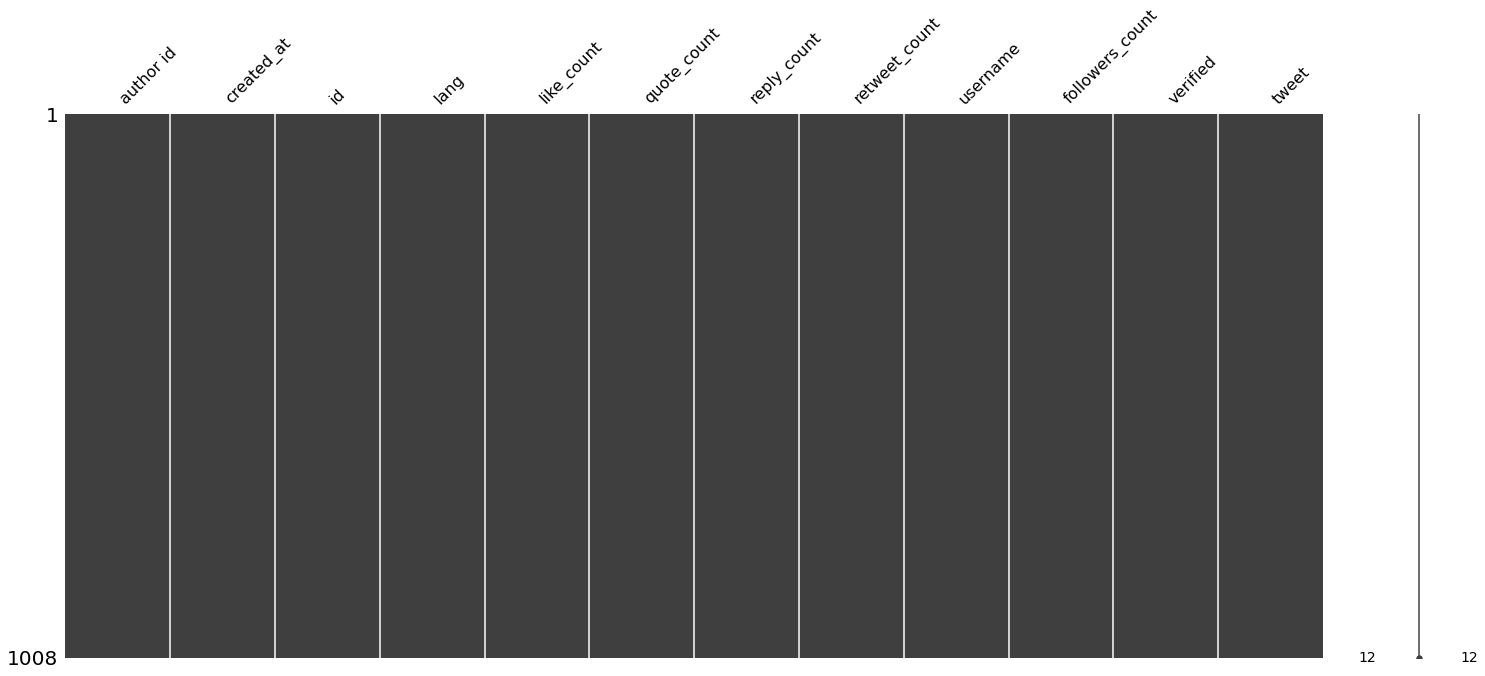

In [ ]:
msno.matrix(data_df)

<Axes: >

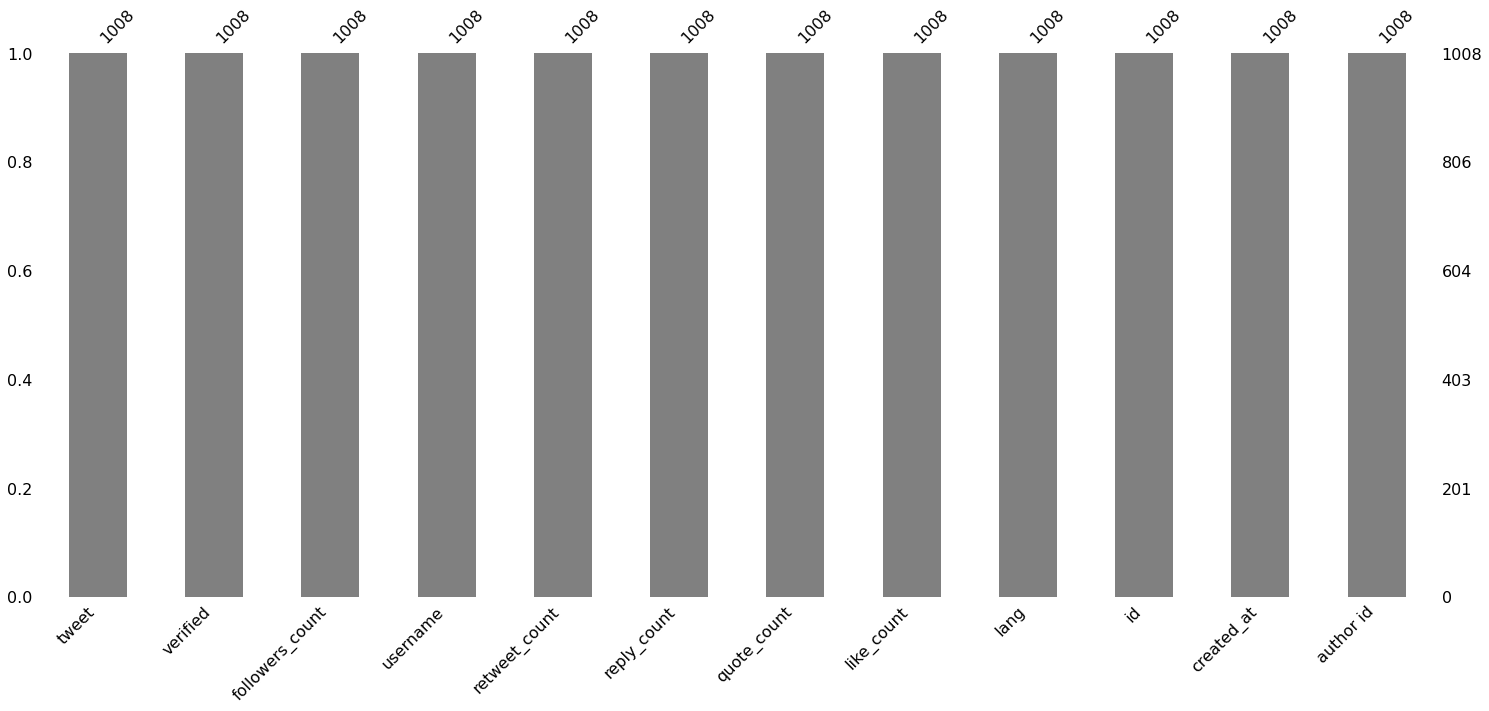

In [ ]:
msno.bar(data_df, color = "gray", sort = "descending")
# notice that there is no geo index

/usr/local/lib/python3.9/dist-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/usr/local/lib/python3.9/dist-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


<Axes: >

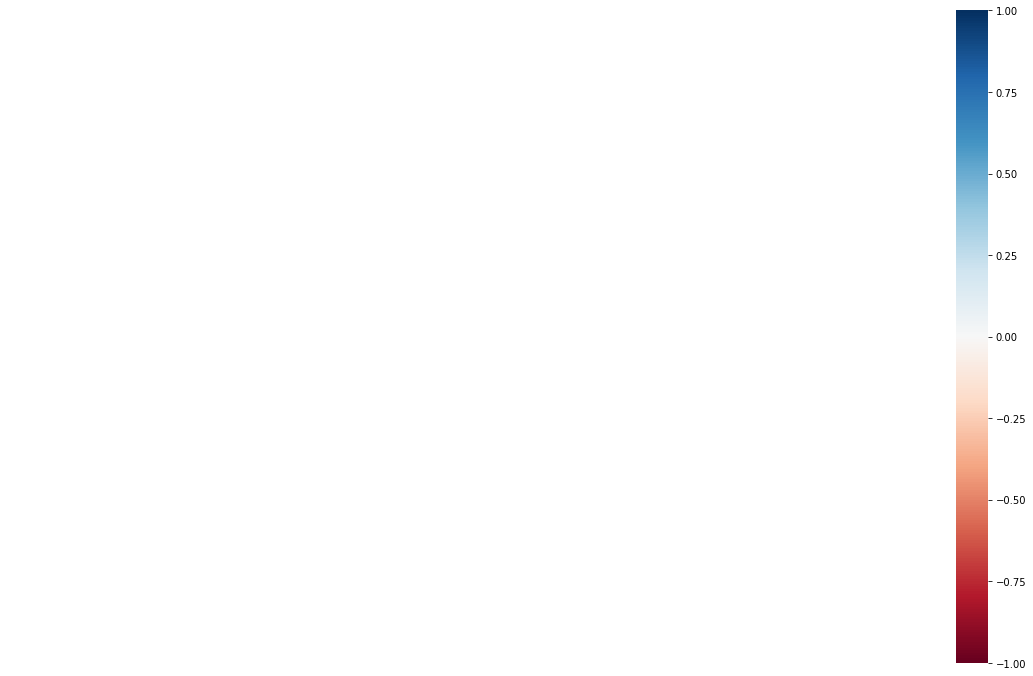

In [ ]:
msno.heatmap(data_df)

In [ ]:
data_df.columns

Index(['author id', 'created_at', 'id', 'lang', 'like_count', 'quote_count',
       'reply_count', 'retweet_count', 'username', 'followers_count',
       'verified', 'tweet'],
      dtype='object')

**Step three NLTK part**

In [ ]:
import nltk.corpus
corpus_data_df = np.array(data_df['tweet'].values)
print(corpus_data_df)

['U.S. Scrambles to Prepare Financial Backstop to Stave Off Banking Panic.\nSilicon Valley Bank, the 16the largest bank by assets in the U.S., failed on Friday. Now the government is worried that customers may try to withdraw funds from other banks.\n\nhttps://t.co/MkUwhuQI3g'
 'NPCs out here actually defending Silicon Valley Bank.  I thought y\'all were supposed to be against big, fat multinational corporations that screw everybody over.  I guess it\'s okay when "your side" does it, though.  🤷\u200d♂️'
 '@dwr Wokring as contractor dev for top silicon valley crypto companies, in certain EU countries. \n\nBanks wont open a bank account for you years ago. It has only gotten worse'
 ...
 'Yellen says government trying to help Silicon Valley Bank depositors but dismisses bailout https://t.co/mXqfwxiECa https://t.co/t1tHCHnMji'
 'Silicon Valley Bank collapse: US regulators bail out SVB customers, who can access all their money Monday - ABC7 New York https://t.co/Or1DNqI2aO'
 'US rolls out e

In [ ]:
nltk.pos_tag(corpus_data_df) # this is a speech tagger to tag the given list of tokens

[('U.S. Scrambles to Prepare Financial Backstop to Stave Off Banking Panic.\nSilicon Valley Bank, the 16the largest bank by assets in the U.S., failed on Friday. Now the government is worried that customers may try to withdraw funds from other banks.\n\nhttps://t.co/MkUwhuQI3g',
  'NNP'),
 ('NPCs out here actually defending Silicon Valley Bank.  I thought y\'all were supposed to be against big, fat multinational corporations that screw everybody over.  I guess it\'s okay when "your side" does it, though.  🤷\u200d♂️',
  'NNP'),
 ('@dwr Wokring as contractor dev for top silicon valley crypto companies, in certain EU countries. \n\nBanks wont open a bank account for you years ago. It has only gotten worse',
  'NNP'),
 ('@unusual_whales Depositors for SVB #SiliconValleyBank Silicon Valley Bank (16th largest U.S. bank) &amp; Signature Bank (40th) will be protected, no losses associated.\n2 Banks failure -- 48 hours. \nBut Treasury (per Bloomberg) found the 3rd (or even 4th bank). Contagion.

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
import re
tokenizer = WordPunctTokenizer()
# Define a function to normalize a document
def normalize_document(text):
    # Lowercase the document
    text = text.lower()

    # Remove special characters
    text= re.sub(r'[^a-zA-Z0-9\s]', '', text, re.I|re.A)

    # Tokenize the document
    tokens = tokenizer.tokenize(text)

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token not in stop_words]

    # Rejoin the filtered tokens
    text = ' '.join(filtered_tokens)

    return text

In [ ]:
normalize_document("Hello my name is frano#@")


'hello name frano'

In [ ]:
normalize_doc_vectorized = np.vectorize(normalize_document)

# Define a function that applies the vectorized function to a NumPy array
def normalize_corpus(corpus):
    # Apply the vectorized function to the input corpus
    normalized_corpus = normalize_doc_vectorized(corpus)

    # Return the normalized corpus as a NumPy array
    return np.array(normalized_corpus)


In [ ]:
normal_corpus = normalize_corpus(corpus_data_df)
# Print the normalized corpus
print(normal_corpus)

['us scrambles prepare financial backstop stave banking panic silicon valley bank 16the largest bank assets us failed friday government worried customers may try withdraw funds banks httpstcomkuwhuqi3g'
 'npcs actually defending silicon valley bank thought yall supposed big fat multinational corporations screw everybody guess okay side though'
 'dwr wokring contractor dev top silicon valley crypto companies certain eu countries banks wont open bank account years ago gotten worse'
 ...
 'yellen says government trying help silicon valley bank depositors dismisses bailout httpstcomxqfwxieca httpstcot1thchnmji'
 'silicon valley bank collapse us regulators bail svb customers access money monday abc7 new york httpstcoor1dnqi2ao'
 'us rolls emergency measures silicon valley bank collapse httpstcow6ej93p4pb']


**Step four Sentiment Analysis**

In [ ]:
analyzer = SentimentIntensityAnalyzer()

In [ ]:
# we decided the best course of action would be to foucs on one column, that being tweet
data_df = data_df.drop(['author id', 'created_at', 'id', 'lang', 'like_count', 'quote_count',
       'reply_count', 'retweet_count', 'username', 'followers_count',
       'verified'], axis =1)


In [ ]:
data_df['neg'] = data_df['tweet'].apply(lambda x:analyzer.polarity_scores(x)['neg'])
data_df['neu'] = data_df['tweet'].apply(lambda x:analyzer.polarity_scores(x)['neu'])
data_df['pos'] = data_df['tweet'].apply(lambda x:analyzer.polarity_scores(x)['pos'])
data_df['compound'] = data_df['tweet'].apply(lambda x: analyzer.polarity_scores(x)['compound'])
data_df['Scores'] = data_df['tweet'].apply(lambda x: analyzer.polarity_scores(x)['compound'])
print(data_df)

                                                  tweet    neg    neu    pos  \
0     U.S. Scrambles to Prepare Financial Backstop t...  0.181  0.784  0.035   
1     NPCs out here actually defending Silicon Valle...  0.036  0.916  0.048   
2     @dwr Wokring as contractor dev for top silicon...  0.091  0.794  0.115   
3     @unusual_whales Depositors for SVB #SiliconVal...  0.128  0.751  0.121   
4     Depositors in NZ banks shouldn’t be concerned ...  0.133  0.809  0.058   
...                                                 ...    ...    ...    ...   
1003  Government Steps In With Plan to Protect All D...  0.000  0.833  0.167   
1004  Regulators Shut Down Second Bank In Race To Co...  0.167  0.833  0.000   
1005  Yellen says government trying to help Silicon ...  0.097  0.790  0.112   
1006  Silicon Valley Bank collapse: US regulators ba...  0.132  0.868  0.000   
1007  US rolls out emergency measures after Silicon ...  0.392  0.608  0.000   

      compound  Scores  
0      -0.7964

In [ ]:
data_df["sentiment"] = data_df["Scores"].apply(lambda x: "Positive" if x > 0 else "Negative" if x < 0 else "Neutral")
print(data_df)

                                                  tweet    neg    neu    pos  \
0     U.S. Scrambles to Prepare Financial Backstop t...  0.181  0.784  0.035   
1     NPCs out here actually defending Silicon Valle...  0.036  0.916  0.048   
2     @dwr Wokring as contractor dev for top silicon...  0.091  0.794  0.115   
3     @unusual_whales Depositors for SVB #SiliconVal...  0.128  0.751  0.121   
4     Depositors in NZ banks shouldn’t be concerned ...  0.133  0.809  0.058   
...                                                 ...    ...    ...    ...   
1003  Government Steps In With Plan to Protect All D...  0.000  0.833  0.167   
1004  Regulators Shut Down Second Bank In Race To Co...  0.167  0.833  0.000   
1005  Yellen says government trying to help Silicon ...  0.097  0.790  0.112   
1006  Silicon Valley Bank collapse: US regulators ba...  0.132  0.868  0.000   
1007  US rolls out emergency measures after Silicon ...  0.392  0.608  0.000   

      compound  Scores sentiment  
0   

In [ ]:
data_df.head(100)


,tweet,neg,neu,pos,compound,Scores,sentiment
0,U.S. Scrambles to Prepare Financial Backstop t...,0.181,0.784,0.035,-0.7964,-0.7964,Negative
1,NPCs out here actually defending Silicon Valle...,0.036,0.916,0.048,0.1280,0.1280,Positive
2,@dwr Wokring as contractor dev for top silicon...,0.091,0.794,0.115,-0.0516,-0.0516,Negative
3,@unusual_whales Depositors for SVB #SiliconVal...,0.128,0.751,0.121,-0.3337,-0.3337,Negative
4,Depositors in NZ banks shouldn’t be concerned ...,0.133,0.809,0.058,-0.5574,-0.5574,Negative
...,...,...,...,...,...,...,...
95,Can the chaos from Silicon Valley Bank’s fall ...,0.270,0.730,0.000,-0.5719,-0.5719,Negative
96,Breaking: FDIC to Make Good All Deposits at Si...,0.000,0.828,0.172,0.4404,0.4404,Positive
97,Regulators Shut Down Second Bank In Race To Co...,0.132,0.868,0.000,-0.4939,-0.4939,Negative
98,Breaking: FDIC to Make Good All Deposits at Si...,0.000,0.828,0.172,0.4404,0.4404,Positive


**Step five visuals of the data**

In [ ]:
# since the dataset is over 1000 we decide a sample of 100 tweets to ensure we developed a polarity score needed for this
sample_data = data_df.head(100)
sample_data

,tweet,neg,neu,pos,compound,Scores,sentiment
0,U.S. Scrambles to Prepare Financial Backstop t...,0.181,0.784,0.035,-0.7964,-0.7964,Negative
1,NPCs out here actually defending Silicon Valle...,0.036,0.916,0.048,0.1280,0.1280,Positive
2,@dwr Wokring as contractor dev for top silicon...,0.091,0.794,0.115,-0.0516,-0.0516,Negative
3,@unusual_whales Depositors for SVB #SiliconVal...,0.128,0.751,0.121,-0.3337,-0.3337,Negative
4,Depositors in NZ banks shouldn’t be concerned ...,0.133,0.809,0.058,-0.5574,-0.5574,Negative
...,...,...,...,...,...,...,...
95,Can the chaos from Silicon Valley Bank’s fall ...,0.270,0.730,0.000,-0.5719,-0.5719,Negative
96,Breaking: FDIC to Make Good All Deposits at Si...,0.000,0.828,0.172,0.4404,0.4404,Positive
97,Regulators Shut Down Second Bank In Race To Co...,0.132,0.868,0.000,-0.4939,-0.4939,Negative
98,Breaking: FDIC to Make Good All Deposits at Si...,0.000,0.828,0.172,0.4404,0.4404,Positive


/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='compound', ylabel='Scores'>

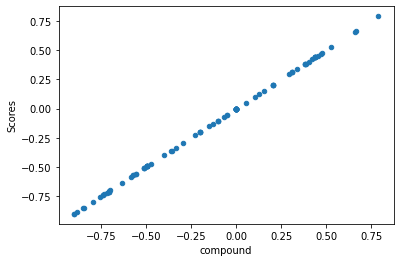

In [ ]:
import matplotlib.pyplot as plt
sample_data.plot.scatter(x='compound', y='Scores')

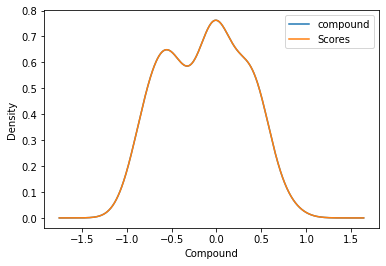

In [ ]:
sample_data['compound'].plot(kind = 'kde')
sample_data['Scores'].plot(kind = 'kde');
plt.legend()
plt.xlabel('Compound');

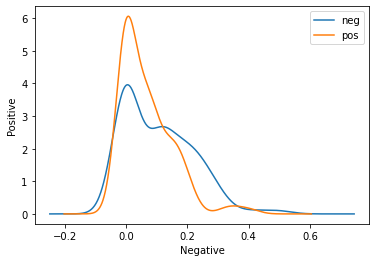

In [ ]:
sample_data['neg'].plot(kind = 'kde')
sample_data['pos'].plot(kind = 'kde');
plt.legend()
plt.xlabel('Negative')
plt.ylabel('Positive');

<BarContainer object of 100 artists>

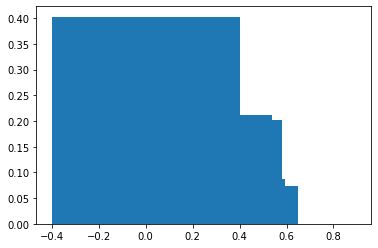

In [ ]:
fig, axl = plt.subplots()
axl.bar(sample_data['neg'], sample_data['pos'])


<BarContainer object of 100 artists>

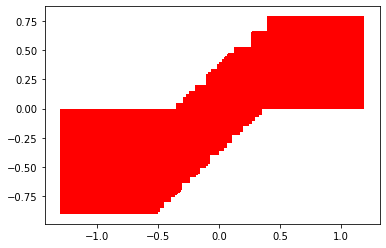

In [ ]:
fig, axl = plt.subplots()
axl.bar(sample_data['compound'], sample_data['Scores'], color = "red",)